# Indonesian Idol Prediction using Fuzzy Logic
IF4070 Knowledge Representation and Reasoning assignment

Authors:
1. Nicholas Rianto P./13516020
2. Dionesius Agung Andika P./13516043
3. Ahmad Izzan/13516115

## Indonesian Idol Prediction
Fuzzy logic controller will be applied to predict Indonesian Idol contest winner based on voice quality, popularity, and attractiveness.

In [1]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Antecednets (Inputs) for calculating winning chance
voice_quality = ctrl.Antecedent(np.arange(0, 11, 1), 'voice_quality')
popularity = ctrl.Antecedent(np.arange(0, 15001, 1), 'popularity')
attractiveness = ctrl.Antecedent(np.arange(0, 11, 1), 'attractiveness')
winning_chance = ctrl.Consequent(np.arange(0, 101, 1), 'winning_chance')

# Membership function population
voice_names = ['poor', 'average', 'gifted']
popularity_level = ['obscure', 'not_popular', 'known', 'celebrity']
attractiveness_level = ['very_unappealing', 'under_average', 'good_looking', 'very_attractive']
voice_quality.automf(names=voice_names)
popularity.automf(names=popularity_level)
attractiveness.automf(names=attractiveness_level)

# Set winning_chance universe
winning_chance['no_chance'] = fuzz.trimf(winning_chance.universe, [0, 0, 25])
winning_chance['slight_chance'] = fuzz.trimf(winning_chance.universe, [0, 25, 50])
winning_chance['fifty_fifty'] = fuzz.trimf(winning_chance.universe, [25, 50, 75])
winning_chance['good_chance'] = fuzz.trimf(winning_chance.universe, [50, 75, 100])
winning_chance['most_likely'] = fuzz.trimf(winning_chance.universe, [75, 100, 100])

/home/dionesius/.local/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


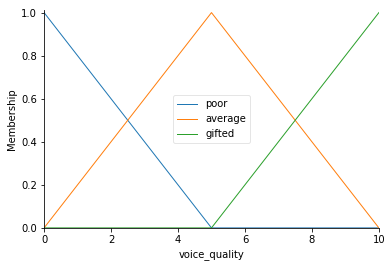

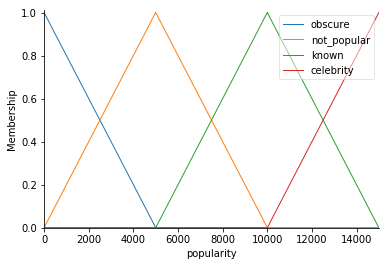

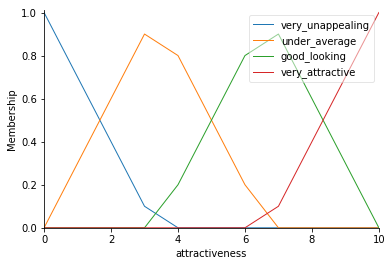

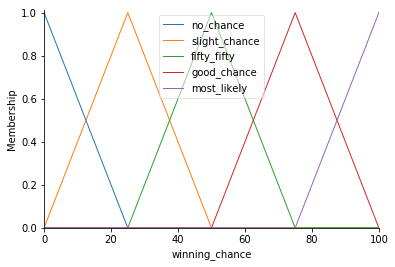

In [2]:
voice_quality.view()
popularity.view()
attractiveness.view()
winning_chance.view()

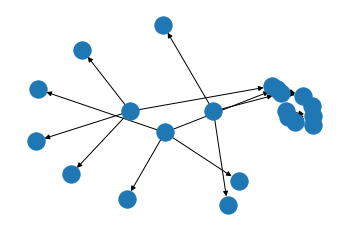

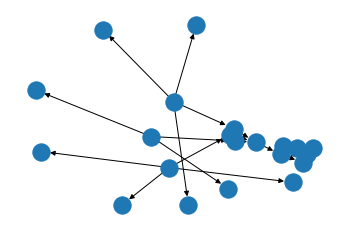

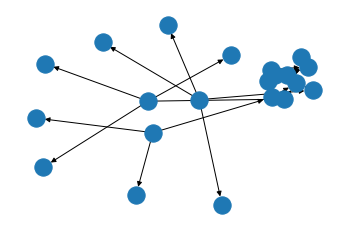

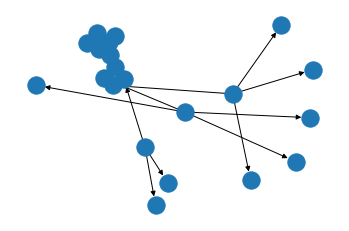

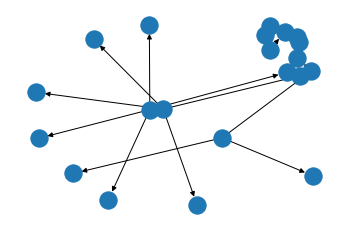

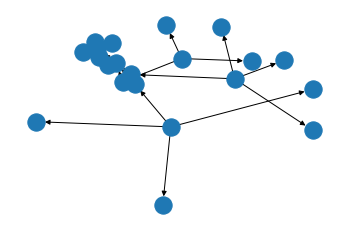

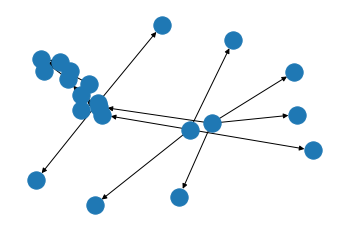

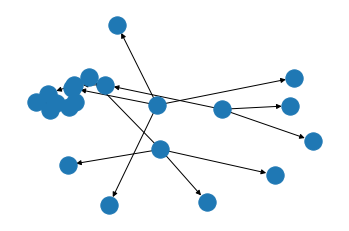

In [41]:
# Set Rules
rules = []
# rule1 = ctrl.Rule(voice_quality['poor'] | popularity['obscure'] | attractiveness['very_unappealing'], winning_chance['no_chance'])
# rule2 = ctrl.Rule((popularity['not_popular'] | attractiveness['so-so']) & voice_quality['average'], winning_chance['fifty_fifty'])
# rule3 = ctrl.Rule(voice_quality['gifted'] | popularity['celebrity'] | attractiveness['very_attractive'], winning_chance['most_likely'])
rules.append(ctrl.Rule(voice_quality['gifted'] & (popularity['celebrity'] | attractiveness['very_attractive']), winning_chance['most_likely']))
rules.append(ctrl.Rule(voice_quality['gifted'] & (popularity['known'] | attractiveness['good_looking']), winning_chance['good_chance']))
rules.append(ctrl.Rule(voice_quality['gifted'] & (popularity['obscure'] | attractiveness['very_unappealing']), winning_chance['fifty_fifty']))
rules.append(ctrl.Rule(voice_quality['average'] & (popularity['celebrity'] | attractiveness['very_attractive']), winning_chance['good_chance']))
rules.append(ctrl.Rule((voice_quality['poor'] & (popularity['celebrity'] | attractiveness['very_attractive'])), winning_chance['fifty_fifty']))
rules.append(ctrl.Rule(voice_quality['average'] | popularity['known'] | attractiveness['good_looking'], winning_chance['fifty_fifty']))
rules.append(ctrl.Rule(voice_quality['average'] & popularity['not_popular'] & attractiveness['under_average'], winning_chance['slight_chance']))
rules.append(ctrl.Rule(voice_quality['poor'] & popularity['obscure'] & attractiveness['very_unappealing'], winning_chance['no_chance']))

for rule in rules:
    rule.view()

In [44]:
# Input
participants = [
    {
        "name": "Ziva Magnolia",
        "voice_quality": 9.8,
        "instagram_followers": 10000000,
        "attractiveness": 9.9
    },
    {
        "name": "Keisya Levronka",
        "voice_quality": 7.3,
        "instagram_followers": 66800,
        "attractiveness": 8.4
    },
    {
        "name": "Adi Sihotang",
        "voice_quality": 9,
        "instagram_followers": 1021,
        "attractiveness": 0.8
    },
    {
        "name": "Saiful Akbar",
        "voice_quality": 0.9,
        "instagram_followers": 1,
        "attractiveness": 0
    },
]
for participant in participants:
    winning_ctrl = ctrl.ControlSystem(rules)
    winning = ctrl.ControlSystemSimulation(winning_ctrl)
    winning.input['voice_quality'] = participant['voice_quality']
    winning.input['popularity']    = participant['instagram_followers']
    winning.input['attractiveness']  = participant['attractiveness']
    winning.compute()
    print("Winning chance of", participant['name'], ':', winning.output['winning_chance'])

Winning chance of Ziva Magnolia : 85.96961325966853
Winning chance of Keisya Levronka : 64.98892920271656
Winning chance of Adi Sihotang : 43.95667293641704
Winning chance of Saiful Akbar : 25.292539643414685
